<a href="https://colab.research.google.com/github/Srinaveenabishek007/Srinaveenabishek-007-cseiot-A/blob/main/07_srinaveenabishek_cse_iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [33]:
from google.colab import files
file_handle = files.upload()

Saving GeneralEsportData.csv to GeneralEsportData.csv


In [34]:
df = pd.read_csv("GeneralEsportData.csv",encoding='cp1252')
df.head(20)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2280004.90,720999.87,1508,1107
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,75765.25,217.00,115,56
4,Age of Empires Online,2011,Strategy,5283.56,775.00,22,16
5,Age of Mythology,2002,Strategy,100551.00,52000.00,129,121
6,Among Us,2018,Strategy,86000.00,0.00,14,8
7,Auto Chess,2019,Strategy,1143720.28,1037122.28,123,36
8,Brawl Stars,2018,Strategy,2557950.00,1336250.00,215,31
9,Chess.com,2007,Strategy,1826564.33,0.00,771,272


In [35]:
df.tail()


,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
547,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.0,170000.0,39,3
548,Knockout City,2021,Third-Person Shooter,0.0,0.0,0,0
549,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,100.0,0.0,6,1
550,Rogue Company,2020,Third-Person Shooter,50000.0,0.0,48,2
551,The Division 2,2019,Third-Person Shooter,27250.0,0.0,40,2


In [36]:
df = df[['TotalEarnings', 'TotalTournaments']]
df.head(20)

,TotalEarnings,TotalTournaments
0,191181.81,99
1,2280004.90,1107
2,93913.65,120
3,75765.25,56
4,5283.56,16
5,100551.00,121
6,86000.00,8
7,1143720.28,36
8,2557950.00,31
9,1826564.33,272


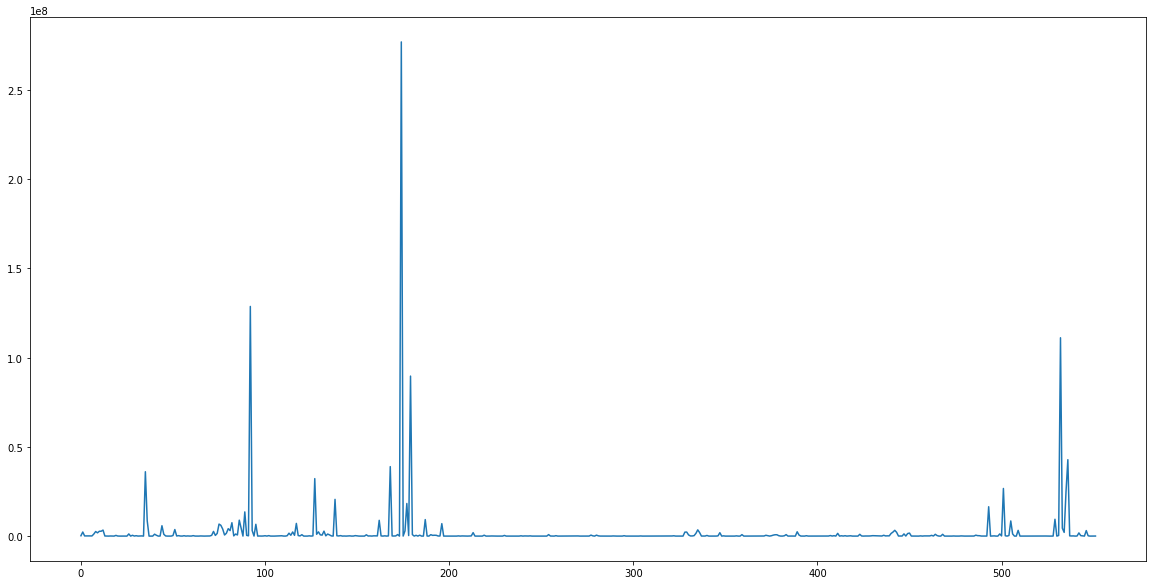

In [37]:
plt.plot(df["TotalEarnings"],label='Total Earnings')

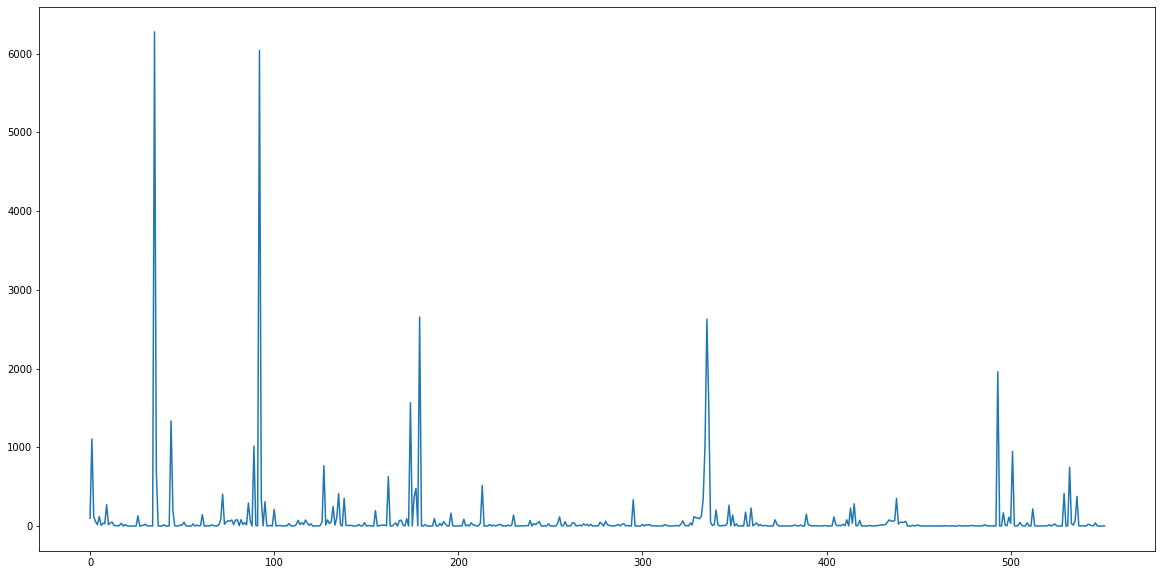

In [38]:
plt.plot(df["TotalTournaments"],label='Total Number of Touraments')

In [39]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['TotalTournaments','TotalEarnings'])
for i in range(0,len(data)):
    data["TotalEarnings"][i]=df["TotalEarnings"][i]
    data["TotalTournaments"][i]=df['TotalTournaments'][i]
data.head()

,TotalTournaments,TotalEarnings
0,99,191182
1,1107,2.28e+06
2,120,93913.6
3,56,75765.2
4,16,5283.56


In [40]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.TotalTournaments
data.drop("TotalTournaments",axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [47]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [41]:
x_train_data = np.asarray(x_train_data)
y_train_data = np.asarray(y_train_data)

In [48]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

140/140 - 6s - loss: 0.0098 - 6s/epoch - 46ms/step


In [49]:
predicted_Total_Earnings=lstm_model.predict(X_test)
predicted_Total_Earnings=scaler.inverse_transform(predicted_Total_Earnings)

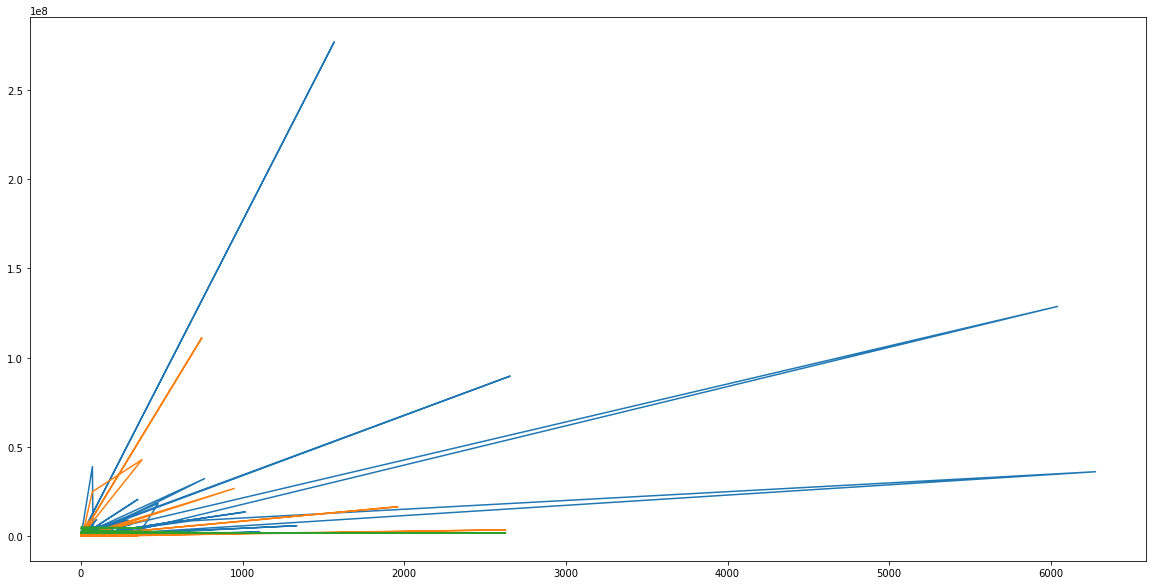

In [50]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_Total_Earnings
plt.plot(train_data["TotalEarnings"])
plt.plot(valid_data[['TotalEarnings',"Predictions"]])